<h1>Extracting Stock Data Using a Python Library</h1>


In [ ]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

In [ ]:
import yfinance as yf
import pandas as pd

#Main Project

Use the Ticker module to create an object for AMD with the ticker symbol is AMD called; name the object amd.

In [ ]:
amd = yf.Ticker("AMD")

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2025-02-05 03:20:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json.2’

amd.json.2          100%[===================>]   5.70K  --.-KB/s    in 0s      

2025-02-05 03:20:46 (1.67 GB/s) - ‘amd.json.2’ saved [5838/5838]



In [ ]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.

In [ ]:
amd_info['country']

'United States'

<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [ ]:
amd_info['sector']

'Technology'

In [ ]:
amd_share_price_data = amd.history(period="max")

In [ ]:
amd_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


In [ ]:
first_day_Volume = amd_share_price_data.iloc[0]['Volume']

In [ ]:
print(first_day_Volume)

219600.0


<h1>Extracting Stock Data Using a Web Scraping</h1>

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [ ]:
data  = requests.get(url).text
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><met

In [ ]:
soup = BeautifulSoup(data, 'html.parser')

In [ ]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [ ]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    # Finally we append the data of each row to the table
    netflix_data = pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)

In [ ]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


#Main Project

In [ ]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
data  = requests.get(url).text  # Fetch data from the Amazon URL

In [ ]:
soup = BeautifulSoup(data, 'html.parser')

Question 1: What is the content of the title attribute?

In [ ]:
title_content = soup.title.string
print(title_content)

Amazon.com, Inc. (AMZN) Stock Historical Prices & Data - Yahoo Finance


In [ ]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    # Finally we append the data of each row to the table

    amazon_data = pd.concat([amazon_data, pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)

Print out the first five rows of the amazon_data data frame.

In [ ]:
print(amazon_data.head(5))

           Date      Open      High       Low     Close       Volume Adj Close
0  Jan 01, 2021  3,270.00  3,363.89  3,086.00  3,206.20   71,528,900  3,206.20
1  Dec 01, 2020  3,188.50  3,350.65  3,072.82  3,256.93   77,556,200  3,256.93
2  Nov 01, 2020  3,061.74  3,366.80  2,950.12  3,168.04   90,810,500  3,168.04
3  Oct 01, 2020  3,208.00  3,496.24  3,019.00  3,036.15  116,226,100  3,036.15
4  Sep 01, 2020  3,489.58  3,552.25  2,871.00  3,148.73  115,899,300  3,148.73


Question 2: What are the names of the columns in the data frame?

In [ ]:
print(amazon_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


Question 3: What is the Open of the last row of the amazon_data data frame?

In [ ]:
last_open = amazon_data.tail(1)["Open"].values[0]
print(last_open)

656.29


<h1>Extracting and Visualizing Stock Data</h1>


In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data

In [ ]:
Tesla = yf.Ticker("TSLA")

In [ ]:
tesla_data = Tesla.history(period = 'max')

In [ ]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head(5))

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


#Question 2: Use Webscraping to Extract Tesla Revenue Data

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text


In [ ]:
soup = BeautifulSoup(html_data, 'html.parser')

In [ ]:
table = soup.find("table")

# Convert the table into a Pandas DataFrame
tesla_revenue = pd.read_html(str(table))[0]

# Rename columns
tesla_revenue.columns = ["Date", "Revenue"]

# Display first five rows
print(tesla_revenue.head())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Execute the following line to remove the comma and dollar sign from the Revenue column.

In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.

In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [ ]:
print(tesla_revenue.tail(5))

    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


# Question 3: Use yfinance to Extract Stock Data

In [ ]:
Gamestop = yf.Ticker("GME")

In [ ]:
gme_data = Gamestop.history(period = 'max')

In [ ]:
gme_data.reset_index(inplace=True)
print(gme_data.head(5))

   index                      Date      Open      High       Low     Close  \
0      0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666   
1      1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250   
2      2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   
3      3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   
4      4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   

     Volume  Dividends  Stock Splits  
0  76216000        0.0           0.0  
1  11021600        0.0           0.0  
2   8389600        0.0           0.0  
3   7410400        0.0           0.0  
4   6892800        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

In [ ]:
soup = BeautifulSoup(html_data_2, 'html.parser')

In [ ]:
# Extract tables from HTML using pandas
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

In [ ]:
print(gme_revenue.tail(5))

          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


## Question 5: Plot Tesla Stock Graph

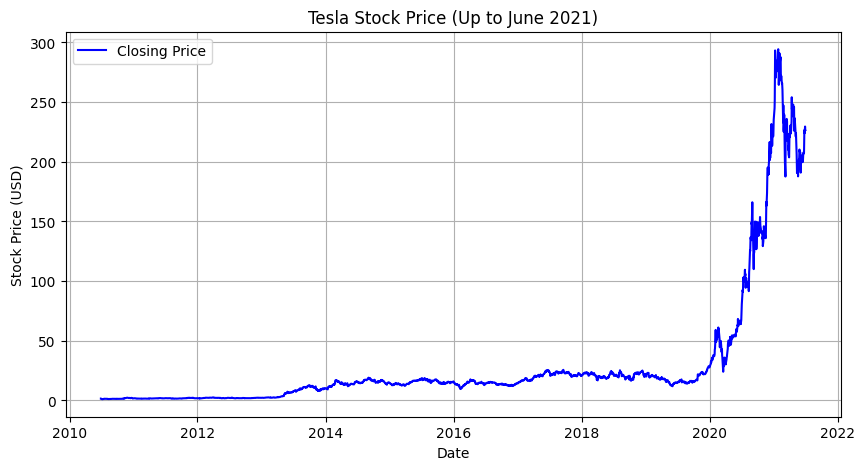

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data["Date"], data["Close"], label="Closing Price", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Load Tesla stock data (assuming you already have tesla_data)
# Ensure Date column is in datetime format
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

# Filter data up to June 2021
tesla_filtered = tesla_data[tesla_data["Date"] <= "2021-06-30"]

# Plot the graph using make_graph
make_graph(tesla_filtered, "Tesla Stock Price (Up to June 2021)")


## Question 6: Plot GameStop Stock Graph


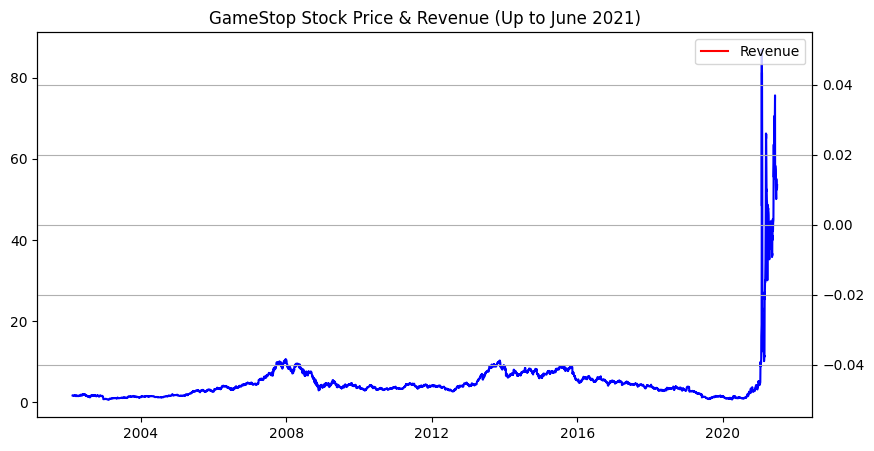

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 5))

    # Plot stock closing prices
    plt.plot(stock_data["Date"], stock_data["Close"], label="Stock Closing Price", color="blue")

    # Plot revenue as a secondary Y-axis
    ax2 = plt.gca().twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], label="Revenue", color="red")

    # Labels and title
    plt.xlabel("Date")
    plt.title(f"{title} Stock Price & Revenue (Up to June 2021)")
    plt.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.grid()

    plt.show()

# Ensure Date columns are in datetime format
gme_data["Date"] = pd.to_datetime(gme_data["Date"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Convert Revenue to numeric (if it's in string format)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# Filter data to include only records up to June 2021
gme_data_filtered = gme_data[gme_data["Date"] <= "2021-06-30"]
gme_revenue_filtered = gme_revenue[gme_revenue["Date"] <= "2021-06-30"]

# Call make_graph function with filtered data
make_graph(gme_data_filtered, gme_revenue_filtered, "GameStop")
